In [46]:
import numpy as np
import matplotlib.pyplot as plt

class TaskAssignmentGA:
  def __init__(self, num_tasks, num_robots, task_durations, task_priorities, robot_efficiencies):
    self.num_tasks = num_tasks
    self.num_robots = num_robots
    self.task_durations = task_durations
    self.task_priorities = task_priorities
    self.robot_efficiencies = robot_efficiencies

  def initialize_population(self, population_size):
    return [np.random.randint(0, self.num_robots, size=self.num_tasks) for _ in range(population_size)]

  def calculate_total_production_time(self, individual):
    total_times = np.zeros(self.num_robots)
    for task, robot_id in enumerate(individual):
      total_times[robot_id] += self.task_durations[task] / self.robot_efficiencies[robot_id]
    return np.max(total_times)

  def compute_workload_balance(self, individual):
    total_times = np.zeros(self.num_robots)
    for task, robot_id in enumerate(individual):
      total_times[robot_id] += self.task_durations[task] / self.robot_efficiencies[robot_id]
    average_time = np.mean(total_times)
    workload_balance = np.std(total_times)
    return workload_balance

  def fitness_function(self, individual):
    total_production_time = self.calculate_total_production_time(individual)
    workload_balance = self.compute_workload_balance(individual)
    # Corrected calculation for weighted priorities
    weighted_priorities = np.sum(self.task_priorities * individual)
    fitness = total_production_time + workload_balance + weighted_priorities
    return fitness

  def selection(self, population, fitness_scores, n_parents):
    selected_parents = []
    for _ in range(n_parents):
      # Ensures unique indices for tournament selection
      tournament_indices = np.random.choice(len(population), size=2, replace=False)
      while tournament_indices[0] == tournament_indices[1]:
        tournament_indices = np.random.choice(len(population), size=2, replace=False)
      selected_parent_index = min(tournament_indices, key=lambda idx: fitness_scores[idx])
      selected_parents.append(population[selected_parent_index])
    return selected_parents

  def crossover(self, parents):
    crossover_point = np.random.randint(1, len(parents[0]))
    child1 = np.concatenate((parents[0][:crossover_point], parents[1][crossover_point:]))
    child2 = np.concatenate((parents[1][:crossover_point], parents[0][crossover_point:]))
    return child1, child2

  def mutation(self, individual, mutation_rate):
    mutated_individual = individual.copy()
    for i in range(len(mutated_individual)):
      if np.random.rand() < mutation_rate:
        mutated_individual[i] = np.random.randint(self.num_robots)
    return mutated_individual


  def visualize_task_assignments(self, individual):
    plt.figure(figsize=(14,13))
    plt.title('Task Assignments Visualization')

    for i, robot_id in enumerate(individual):
      plt.barh(i, 1, left=robot_id, color='blue', align='center')

    for i, efficiency in enumerate(self.robot_efficiencies):
      plt.text(-1, i, f'Robot {i+1} Efficiency: {efficiency:.2f}', verticalalignment='center')

    for i, priority in enumerate(self.task_priorities):
      plt.text(i, -1, f'Task {i+1} Priority: {priority}', rotation=45, verticalalignment='center')


    plt.yticks(range(self.num_tasks), [f'Task {i+1}' for i in range(self.num_tasks)])
    plt.gca().invert_yaxis()
    plt.xlabel('Robots')
    plt.ylabel('Tasks')
    plt.show()

Task Durations: [10  7  1  7  8  5  1  8  7  3]
Task Priorities: [3 3 4 1 2 3 5 2 2 3]
Robot Efficiencies: [1.03226831 0.51538927 0.96707385 1.11077421 1.28051133]


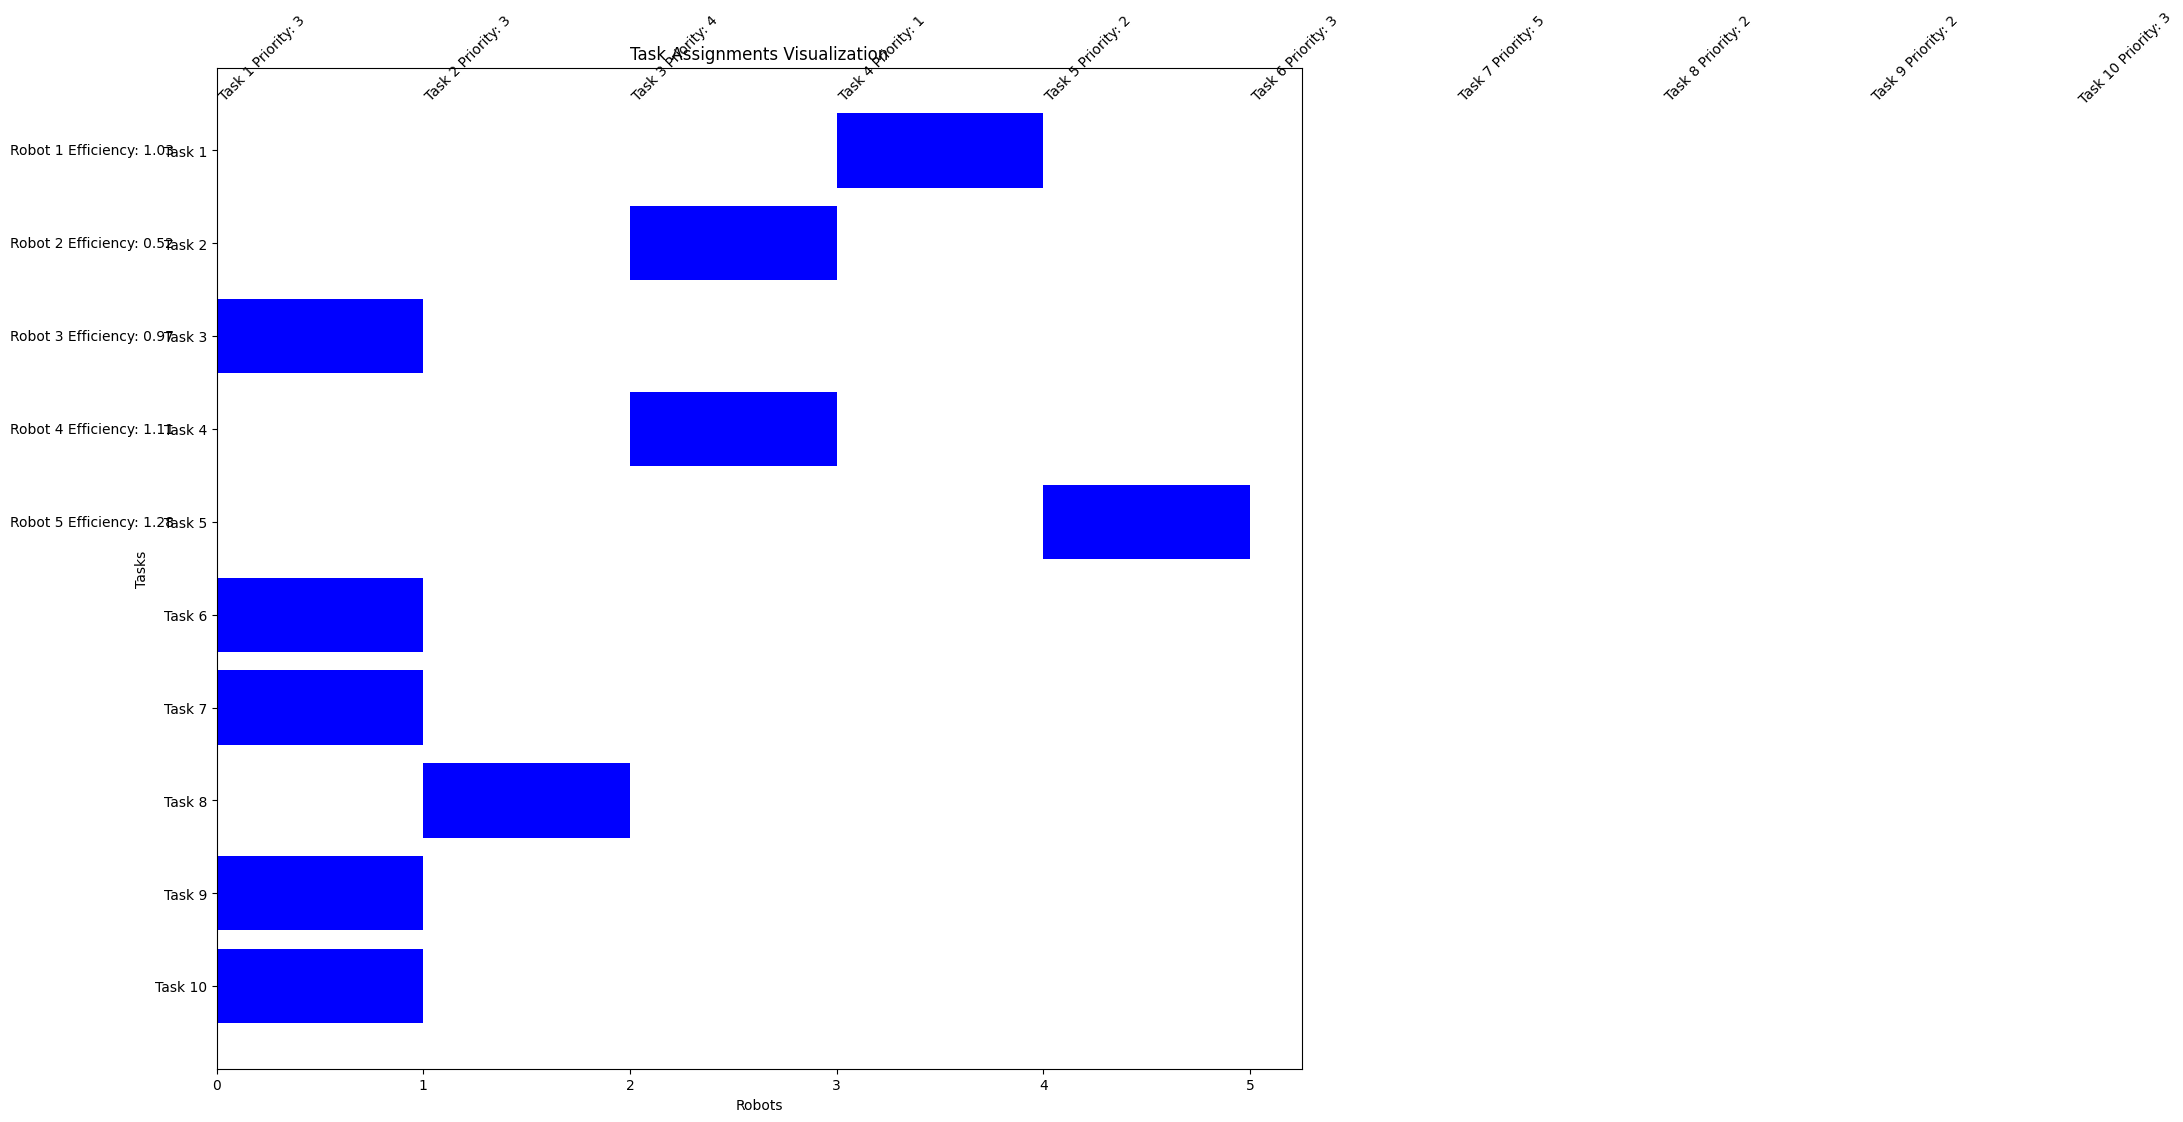

In [47]:
# Mock data
num_tasks = 10
num_robots = 5
task_durations = np.random.randint(1, 11, size=num_tasks)
task_priorities = np.random.randint(1, 6, size=num_tasks)
robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)

# GA parameters
population_size = 50
n_generations = 100
n_parents = 10
mutation_rate = 0.1

# Initialize GA
ga = TaskAssignmentGA(num_tasks, num_robots, task_durations, task_priorities, robot_efficiencies)

# Initialize population
population = ga.initialize_population(population_size)

# GA loop
for generation in range(n_generations):
  fitness_scores = [ga.fitness_function(individual) for individual in population]

  selected_parents = ga.selection(population, fitness_scores, n_parents)
  offspring = []
  for i in range(0, len(selected_parents), 2):
    child1, child2 = ga.crossover(selected_parents[i:i+2])
    offspring.extend([child1, child2])

  mutated_offspring = [ga.mutation(child, mutation_rate) for child in offspring]

  population = selected_parents + mutated_offspring

# Find the best individual
best_individual = min(population, key=ga.fitness_function)
print("Task Durations:", task_durations)
print("Task Priorities:", task_priorities)
print("Robot Efficiencies:", robot_efficiencies)
# Visualize the task assignments for the best solution
ga.visualize_task_assignments(best_individual)
